# 2D Perovskite

Non-3D perovskites can be processed in a similar way. Here we included a trajectory of a 2D perovskites in the EXTXYZ format. The octahedra are composed of Pb and I atoms, so we can just use the default bond length settings. However, unlike the 3D perovskites, the neighbours are not uniformly connected along the three prinsiple axes. One can define this simply with a `dict` (input option `structure_ref_NN1`) where each entry is a Numpy array with the rows being relative position (vector) of each B-site atom to another B-site that belongs to a neighbour group. For example, the defined connections in the below script are shown in this figure. In the second block we also showed the case where this `dict` is not specified, all the NN1 neighbours are considered the same (The `Connection 3` neighbours across layers are not NN1 so not considered), so that only one tilting pattern is given (effectively the combination of `Connection 1` and `Connection 2`). 

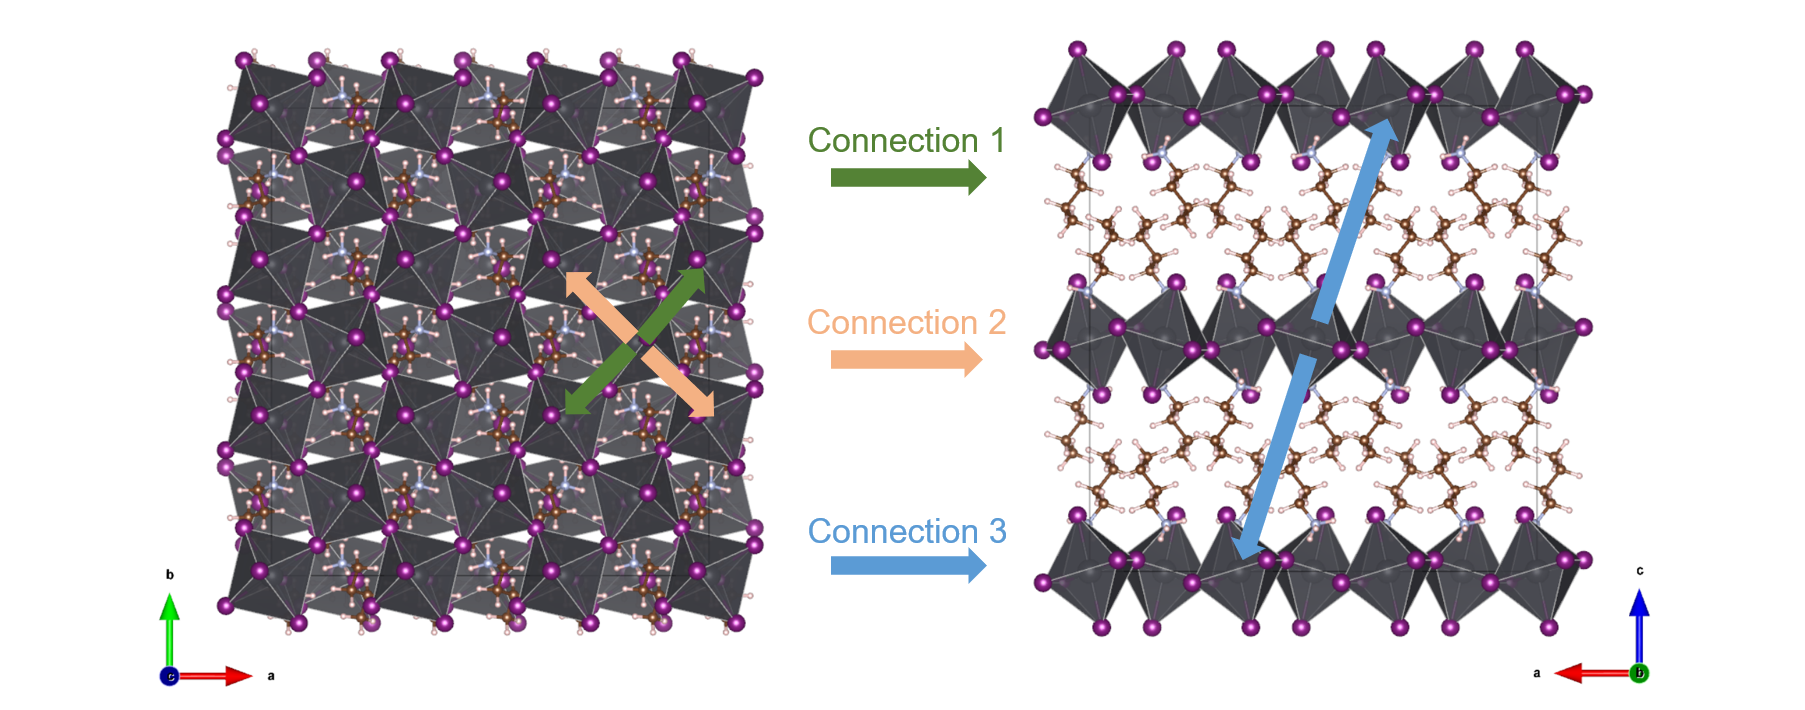

Additionally, in order to obtain a stable matching of octehedra to the perfect references, it if recommended to provide an alignment rotation which rotate all the octahedra so that the BX6 bond vectors are close to the orthogonal orientations. In this case, we chose a 45 degree rotation about the z-axis, corresponding to a notation of `[0,0,45]`. Note that the output tilting patterns are also rotated accordingly. 


------------------------------------------------------------
Loading Trajectory files...
Current sample: test_2D
Time Span: 190.0 ps
Frame count: 38
Reading every 1 frame(s)
Number of atoms: 1404
Temperature: 200K
 
Computing octahedral tilting and distortion...


Progress: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s]


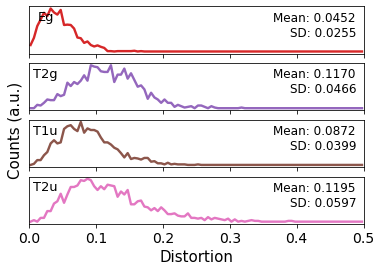

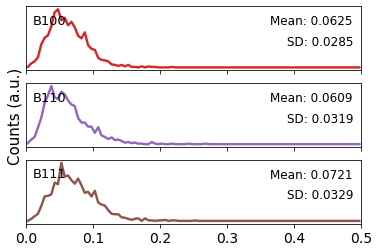

Tilt-Corr-NN1: computing NN1 correlation of tilting in non-3D perovskite structure, neighbours are classified according to user-defined references. 


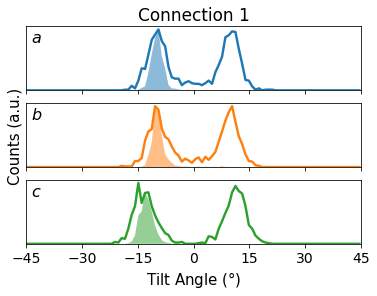

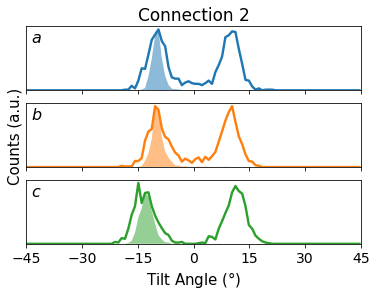

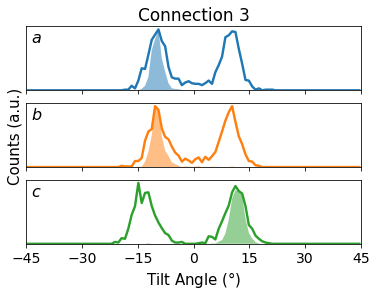

dynamic X-site distortion: [0.0452 0.117  0.0872 0.1195]
dynamic B-site distortion: [0.0625 0.0609 0.0721]
 
 
--Elapsed Time
Data Reading:          00:00:00
Structure Resolving:   00:00:00
Tilting & Distortion:  00:00:05
Total:                 00:00:05
------------------------------------------------------------


In [1]:
import numpy as np
from pdyna.core import Trajectory

# This dict classifies the neighbouring B-sites into categories according to your demand, 
# and the corresponding relative positions (vectors) are stored in the numpy array
tlib = {'Connection 1': np.array([[ 4.3,  4.3,   0.],
                            [-4.3, -4.3,   0.]]),
        'Connection 2': np.array([[ 4.3, -4.3,   0.],
                            [-4.3,  4.3,   0.]]),
        'Connection 3': np.array([[-4.2,  0. , -13.],
                            [ 4.2,  0. ,  13.]]),
        }

MDtup = (200,200,1,5000) # (T_initlal, T_final, timestep, nblock in VASP or equally recording frequency)

traj = Trajectory("extxyz",("trajetory_2D.extxyz", None, MDtup)) # The inputs for EXTXYZ format are (trajectory file, initial frame file, MDtup)
# The initial frame file is optional, if not provided, the first frame in the trajectory file will be used as the initial frame

traj.dynamics(read_mode= 1,       # equilibration mode 
              uniname="test_2D",  # A unique user-defined name for this trajectory, will be used in printing and figure saving
              allow_equil = 0,    # use the entire trajectory
              read_every = 1,     # read every step
              
              toggle_tilt_distort = True, # switch of octahedral tilting and distortion calculation
              
              structure_type = 2,                   # 1: 3C polytype, 2: other non-perovskite with orthogonal reference enabled, 3: other non-perovskite with initial config as reference             
              structure_ref_NN1 = tlib,
              multi_thread = 8,                     # enable multi-threading in this calculation, since not vectorized
              rotation_from_orthogonal = [0,0,45],  # rotation angles in degrees for each axis, to align the structure with your preferred orientation
              )

Current sample: test_2D
Time Span: 190.0 ps
Frame count: 38
Reading every 1 frame(s)
Number of atoms: 1404
Temperature: 200K
 
Computing octahedral tilting and distortion...


Progress: 100%|██████████| 38/38 [00:00<00:00, 52.04it/s]


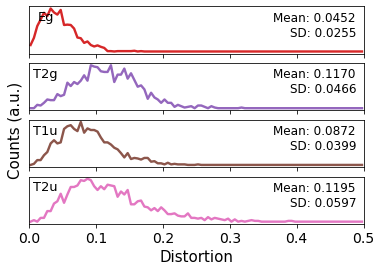

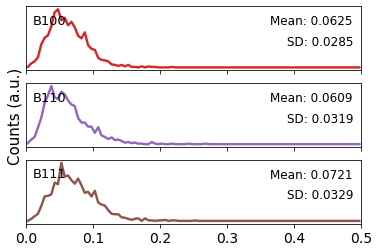

Tilt-Corr-NN1: computing NN1 correlation of tilting in non-3D perovskite structure, all NN1 neighbours are considered the same. 


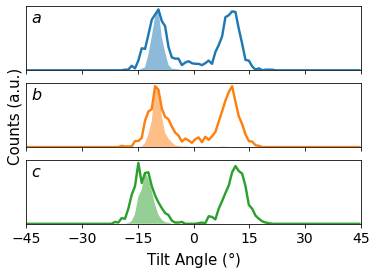

dynamic X-site distortion: [0.0452 0.117  0.0872 0.1195]
dynamic B-site distortion: [0.0625 0.0609 0.0721]
 
 
--Elapsed Time
Data Reading:          00:00:00
Structure Resolving:   00:00:00
Tilting & Distortion:  00:00:01
Total:                 00:00:01
------------------------------------------------------------


In [4]:
traj.dynamics(read_mode= 1,       # equilibration mode 
              uniname="test_2D",  # A unique user-defined name for this trajectory, will be used in printing and figure saving
              allow_equil = 0,    # use the entire trajectory
              read_every = 1,     # read every step
              
              toggle_tilt_distort = True, # switch of octahedral tilting and distortion calculation
              
              structure_type = 2,                   # 1: 3C polytype, 2: other non-perovskite with orthogonal reference enabled, 3: other non-perovskite with initial config as reference             
              structure_ref_NN1 = None,             
              multi_thread = 8,                     # enable multi-threading in this calculation, since not vectorized
              rotation_from_orthogonal = [0,0,45],  # rotation angles in degrees for each axis, to align the structure with your preferred orientation
              )